# Initial Preparation

## Import Packages

In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from pandas_profiling import ProfileReport

## Import Data

In [2]:
url = "https://raw.githubusercontent.com/Cameron-Watts/PDS_Piece/main/data/raw/twitter_training.csv"

df = pd.read_csv(url, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

## Visualise and Explore Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

## Clean Data

<BarContainer object of 4 artists>

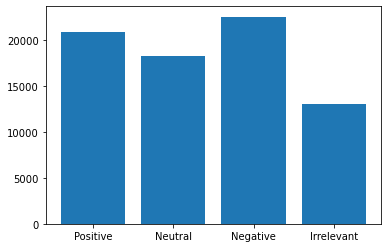

In [6]:
# To see what's going on before dropping datapoints
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

In [7]:
df = df.dropna()

# Further Exploration

In [8]:
df["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [9]:
print(df["Entity"].unique())
print(len(df["Entity"].unique()))

onehot = pd.get_dummies(df["Entity"])

df = df.join(onehot)

df.head()

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']
32


,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 4 artists>

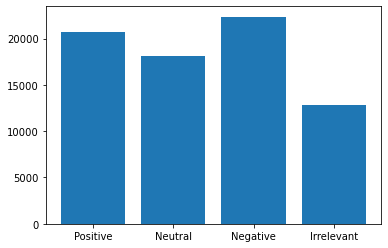

In [10]:
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

## Stop Word Removal and Lemmatization With NLTK

In [68]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


def remove_stopwords(ls):
    #Removes stop words and lemmatises
    ls = [lemmatiser.lemmatize(word) for word in ls if word not in (stopwords.words()) and (word.isalpha())]
    
    ls = " ".join(ls)
    return ls

df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)

lemmatiser = WordNetLemmatizer()

df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cameron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cameron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyboardInterrupt: 

In [48]:
df["Tweet_Content_Split"][0]

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'murder',
 'you',
 'all',
 ',']

## Tokenisation

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokeniser = Tokenizer(num_words=10000)

df["Tweet_Content_Split"] = tokeniser.fit_on_texts(df["Tweet_Content_Split"])

## Padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def padding(sequences):
    return pad_sequences(sequences, truncating = 'post', padding='post', maxlen=50)

df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(padding)

In [ ]:
raise NotImplementedError

## Subsetting Data

In [ ]:
y = df["Sentiment"]

df = df.drop(["Sentiment", "Entity", "Tweet_ID", "Tweet_Content"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

## Testing Methods

In [ ]:
#Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_unique = y_test.unique()
cm = confusion_matrix(y_test, y_pred, labels = y_unique)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()

# Final

## Training With Full Dataset

In [ ]:
#Full dataset: df
#Full labels: y
#Best prediction method: SVC classifier


clf = svm.SVC()

clf.fit(df, y)

## Generating Predictions

## Download and Transform Test Data

In [ ]:
url = "https://raw.githubusercontent.com/Cameron-Watts/PDS_Piece/main/data/raw/twitter_validation.csv"

test_df = pd.read_csv(url, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

## Generate Predictions

In [ ]:
y_pred = clf.predict(test_df)

In [ ]:
accuracy_score(y_true, y_pred)

In [ ]:
#Confusion matrix
y_unique = y_true.unique()
cm = confusion_matrix(y_true, y_pred, labels = y_unique)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot()